#### Example running SpaFHy with jupyter notebook

In [1]:
from model_driver import driver
from iotools import read_results
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os

os.chdir(r'/Users/jpnousu/SpaFHy_v2.0')

# example of calling driver, reading results
outputfile = driver(create_ncf=True, create_spinup=False, folder='testcase_input')
results = xr.open_dataset(outputfile)

*** Understory LAI assigned from LAI_decid and LAI_conif ***
*** Defined root soil IDs: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16} Used root soil IDs: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan, 7.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0} ***
*** Defined organic soil IDs: {0, 1, 2, 3, 4} Used organic soil IDs: {0.0, 1.0, 2.0, 3.0, 4.0, nan} ***
*** State variables assigned from parameters.py ***
*** Simulation forced with: testcase_input/forcing/HYYTIALA_FORCING_1980_2021.csv


/Users/jpnousu/SpaFHy_v2.0/canopygrid.py:761: RuntimeWarning: invalid value encountered in arccos
  dl = 2.0*np.arccos(cosZEN - np.sin(LAT)*np.sin(DECL) / (np.cos(LAT)*np.cos(DECL))) / CF / 15.0  # hours


*** Running model ***
*** TOPMODEL run
*** Bucket organic layer drains according to Campbell 1985
Running timestep:  1
Running timestep:  2
Running timestep:  3
Running timestep:  4


/Users/jpnousu/SpaFHy_v2.0/bucketgrid.py:272: RuntimeWarning: invalid value encountered in power
  Psi = -1 / self.alpha_root*(s**(1.0 / m) - 1.0)**(1.0 / n)  # kPa


Running timestep:  5
Running timestep:  6
Running timestep:  7
Running timestep:  8
Running timestep:  9
Running timestep:  10
Running timestep:  11
Running timestep:  12
Running timestep:  13
Running timestep:  14
Running timestep:  15
Running timestep:  16
Running timestep:  17
Running timestep:  18
Running timestep:  19
Running timestep:  20
Running timestep:  21
Running timestep:  22
Running timestep:  23
Running timestep:  24
Running timestep:  25
Running timestep:  26
Running timestep:  27
Running timestep:  28
Running timestep:  29
Running timestep:  30
Running timestep:  31
Running timestep:  32
Running timestep:  33
Running timestep:  34
Running timestep:  35
Running timestep:  36
Running timestep:  37
Running timestep:  38
Running timestep:  39
Running timestep:  40
Running timestep:  41
Running timestep:  42
Running timestep:  43
Running timestep:  44
Running timestep:  45
Running timestep:  46
Running timestep:  47
Running timestep:  48
Running timestep:  49
Running timeste

/Users/jpnousu/SpaFHy_v2.0/iotools.py:960: RuntimeWarning: overflow encountered in cast
  ncf[key][steps[0]:steps[1],:,:] = results[key][0:steps[1]-steps[0],:,:]


Running timestep:  732
Running timestep:  733
Running timestep:  734
Running timestep:  735
Running timestep:  736
Running timestep:  737
Running timestep:  738
Running timestep:  739
Running timestep:  740
Running timestep:  741
Running timestep:  742
Running timestep:  743
Running timestep:  744
Running timestep:  745
Running timestep:  746
Running timestep:  747
Running timestep:  748
Running timestep:  749
Running timestep:  750
Running timestep:  751
Running timestep:  752
Running timestep:  753
Running timestep:  754
Running timestep:  755
Running timestep:  756
Running timestep:  757
Running timestep:  758
Running timestep:  759
Running timestep:  760
Running timestep:  761
Running timestep:  762
Running timestep:  763
Running timestep:  764
Running timestep:  765
Running timestep:  766
Running timestep:  767
Running timestep:  768
Running timestep:  769
Running timestep:  770
Running timestep:  771
Running timestep:  772
Running timestep:  773
Running timestep:  774
Running tim

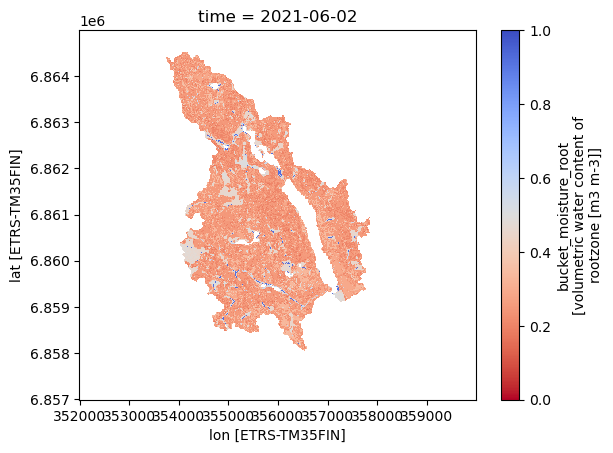

In [2]:
results['bucket_moisture_root'][-30].plot(cmap='coolwarm_r', vmin=0, vmax=1)

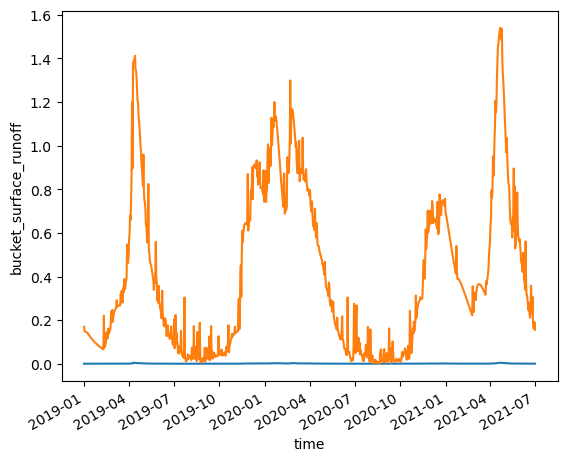

In [3]:
results['top_baseflow'].plot(); results['bucket_surface_runoff'].mean(dim=['lat','lon']).plot()

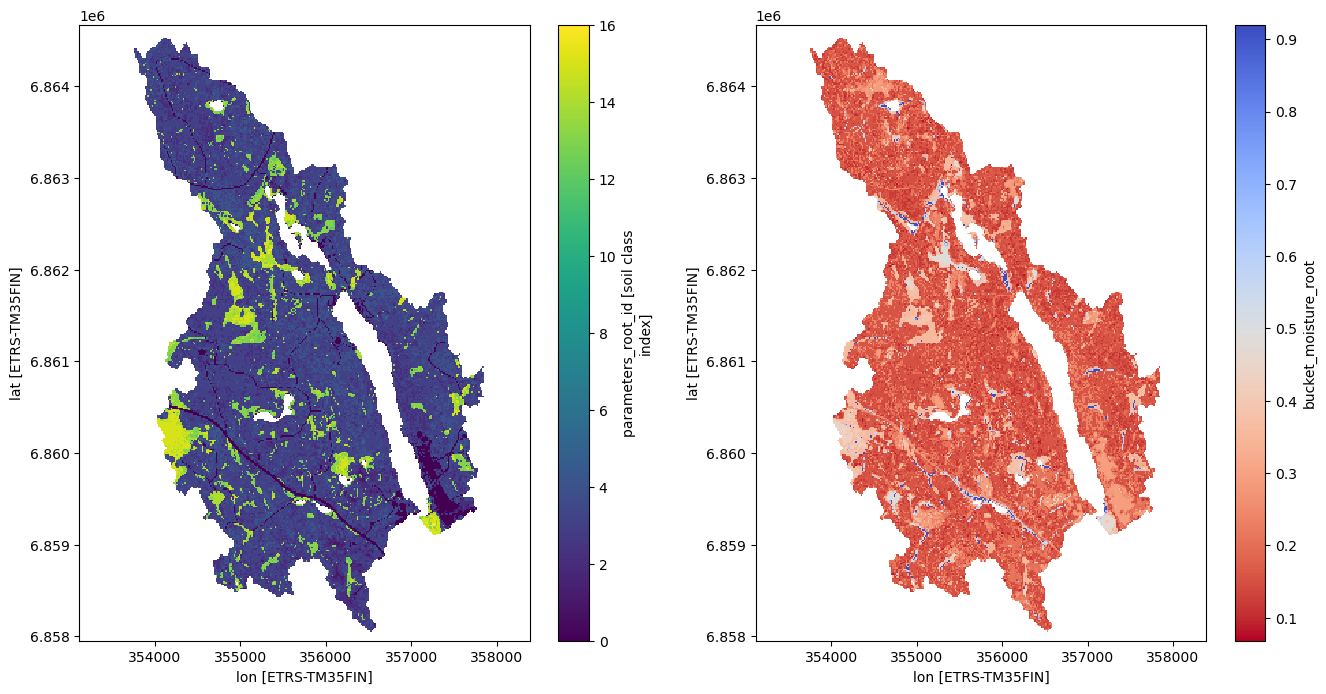

In [3]:
date = '2021-05-01'
plt.figure(figsize=(16,8))
ax=plt.subplot(1,2,1)
results['parameters_root_id'][20:-60,70:-100].plot()
plt.subplot(1,2,2, sharex=ax, sharey=ax)
#results['bucket_moisture_root'].sel(time=date)[20:-60,70:-100].plot(cmap='coolwarm_r')
results['bucket_moisture_root'].mean(dim=['time'])[20:-60,70:-100].plot(cmap='coolwarm_r')
#results['bucket_psi_root'].mean(dim=['time'])[20:-60,70:-100].plot(cmap='coolwarm_r', vmin=-900000)
#plt.subplot(2,2,4, sharex=ax, sharey=ax)
#results['bucket_moisture_top'].sel(time=date)[20:-60,70:-100].plot(cmap='coolwarm_r')

In [7]:
firedata = results[['parameters_soilclass','forcing_wind_speed', 'forcing_air_temperature', 'forcing_relative_humidity', 'bucket_moisture_root', 'bucket_moisture_top']].copy()
firedata['bucket_water_potential_root'] = results['bucket_moisture_root'].copy()

In [48]:
from soilprofile2D import wrc
from parameters import soilprofiles
soilprofiles()['CoarseTextured']['pF']

{'ThetaS': [0.41], 'ThetaR': [0.05], 'alpha': [0.024], 'n': [1.2]}

In [ ]:
soil_id = np.ravel(firedata['parameters_soilclass'])
psi = []       
for time in firedata['time'][0:5]:
    rootmoist = np.ravel(firedata['bucket_moisture_root'])
    for soil in soilprofiles().keys():
        pF_temp = soilprofiles()[soil]['pF']
        id = soilprofiles()[soil]['soil_id']
        psi.append(wrc(theta=rootmoist[soil_id == id], pF=pF_temp))

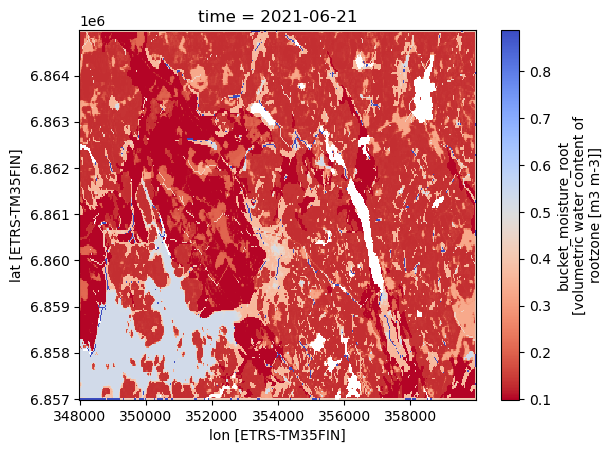

In [4]:
day = '2021-06-21'
results['bucket_moisture_root'].sel(time=day).plot(cmap='coolwarm_r')

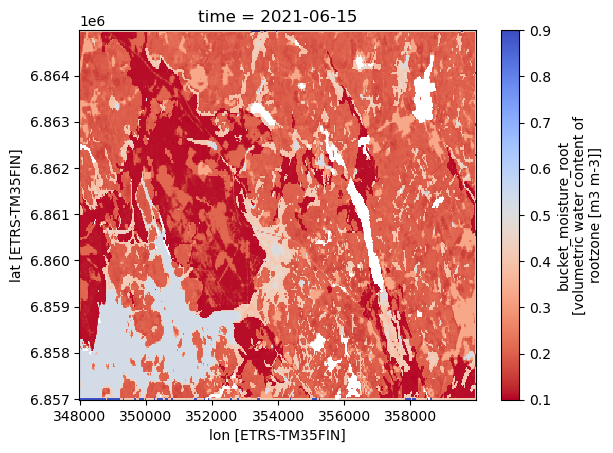

In [11]:
results['bucket_moisture_root'].sel(time='2021-06-15').plot(vmin=0.1, vmax=0.9, cmap='coolwarm_r')

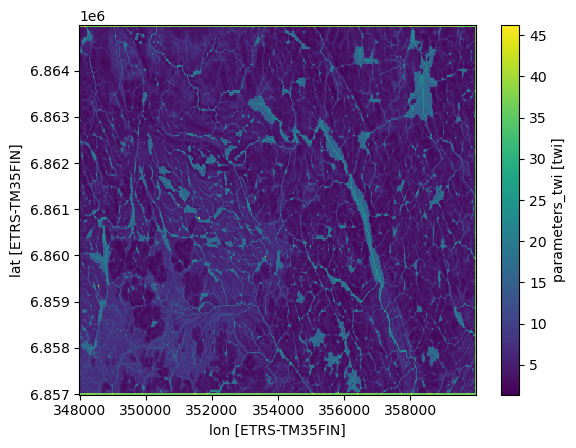

In [5]:
results['parameters_twi'].plot()

In [65]:
from typing import Dict, List, Tuple

def wrc(pF, theta=None, psi=None, draw_pF=False):
    """
    vanGenuchten-Mualem soil water retention model 

    References:
        Schaap and van Genuchten (2005). Vadose Zone 5:27-34
        van Genuchten, (1980). Soil Science Society of America Journal 44:892-898

    Args:
        pF (dict):
            ThetaS (float|array): saturated water content [m3 m-3]
            ThetaR (float|array): residual water content [m3 m-3]
            alpha (float|array): air entry suction [cm-1]
            n (float|array): pore size distribution [-]
        theta (float|array): vol. water content [m3 m-3]
        psi (float|array): water potential [m]
        draw_pF (bool): Draw pF-curve.
    Returns:
        y (float|array): water potential [m] or vol. water content [m3 m-3]. Returns None if only curve is drawn.

    """
    
    EPS = np.finfo(float).eps
    
    Ts = np.array([pF['ThetaS']])
    Tr = np.array([pF['ThetaR']])
    alfa = np.array([pF['alpha']])
    n = np.array([pF['n']])
    m = 1.0 - np.divide(1.0, n)

    mask = 
    
    def theta_psi(x):
        # converts water content [m3 m-3] to potential [m]]
        x = np.minimum(x, Ts)
        x = np.maximum(x, Tr)  # checks limits
        s = (Ts - Tr) / ((x - Tr) + EPS)
        Psi = -1e-2 / alfa*(s**(1.0 / m) - 1.0)**(1.0 / n)  # m
        Psi[np.isnan(Psi)] = 0.0
        return Psi

    def psi_theta(x):
        # converts water potential [m] to water content [m3 m-3]
        x = 100*np.minimum(x, 0)  # cm
        Th = Tr + (Ts - Tr) / (1 + abs(alfa*x)**n)**m
        return Th

    # --- convert between theta <-- --> psi
    if (theta != None).any():
        y = theta_psi(theta)  # 'Theta-->Psi'
    elif (psi != None).any():
        y = psi_theta(psi)  # 'Psi-->Theta'

    # draws pf-curve
    if draw_pF:
        Ts = Ts[0]; Tr = Tr[0]; alpha = alfa[0]; n = n[0]  
        xx = -np.logspace(-4, 5, 100)  # cm
        yy = psi_theta(xx)

        #  field capacity and wilting point
        fc = psi_theta(-1.0)
        wp = psi_theta(-150.0)

        fig = plt.figure(99)
        fig.suptitle('vanGenuchten-Mualem WRC', fontsize=16)
        ttext = r'$\theta_s=$' + str(Ts) + r', $\theta_r=$' + str(Tr) +\
                r', $\alpha=$' + str(alfa) + ',n=' + str(n)

        plt.title(ttext, fontsize=14)
        plt.semilogx(-xx, yy, 'g-')
        plt.semilogx(1, fc, 'ro', 150, wp, 'ro')  # fc, wp
        plt.text(1, 1.1*fc, 'FC'), plt.text(150, 1.2*wp, 'WP')
        plt.ylabel(r'$\theta$  $(m^3m^{-3})$', fontsize=14)
        plt.xlabel('$\psi$ $(m)$', fontsize=14)
        plt.ylim(0.8*Tr, min(1, 1.1*Ts))

        del xx, yy
        y = None
    
    return y

In [67]:
pF1 = {'ThetaS': 0.43, 'ThetaR': 0.05, 'alpha': 0.024, 'n': 1.2}
pF2 = {'ThetaS': 0.88, 'ThetaR': 0.196, 'alpha': 0.072, 'n': 1.255}

theta = np.array([[0.2, 0.1], [0.3, np.nan]])

wrc(pF=pF1, theta=theta, draw_pF=False)

TypeError: only integer scalar arrays can be converted to a scalar index

In [50]:
theta.exists

AttributeError: 'numpy.ndarray' object has no attribute 'exists'

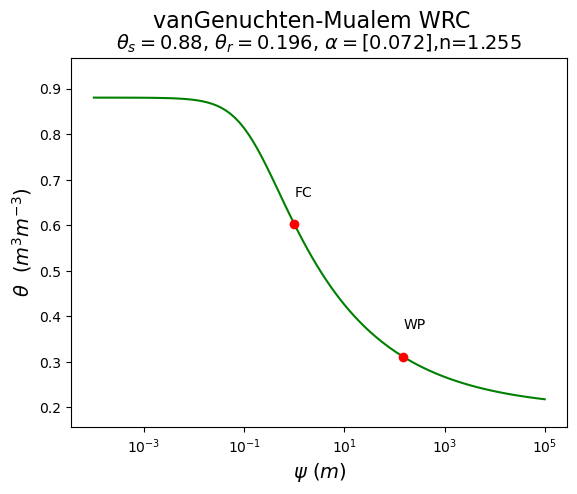